# Inscriptions as data: digital epigraphy in macro-historical perspective

Part 2
Python

In [1]:
# Python requirements (when in Python kernel):

!pip install matplotlib==3.4 sddk tempun scipy seaborn nltk

import nltk
import scipy
from scipy.stats import trapz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import sddk
import tempun # from tempun import *
import requests

#!pip install -r requirements.txt

In [2]:
# Loading the EDH dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_text_cleaned_2021-01-21.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,...,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,...,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",NaN,...,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"Via Nomentana, S. Alessandro, Kirche",1937,NaN,NaN,NaN,NaN,NaN
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,...,ummio isenna Xv,Publio Mummio Publi filio Galeria Sisennae Rut...,Publio Mummio Publi filio Galeria Sisennae Rut...,NaN,before 1975,"Sevilla, Privatbesitz",NaN,NaN,NaN,NaN
3,Gräf,votive inscription,2.5 cm,0200,"AE 1983, 0533. (B); A.U. Stylow, Gerión 1, 198...",checked with photo,(39) cm,[ ]AVS[ ]LLA / M PORCI NIGRI SER / DOMINAE VEN...,[{'name': '[---?]AV(?)S(?)[---]L(?)L(?)A M. Po...,18 cm,...,AVSLLA M Porci Nigri ser dominae Veneri aram p...,AVS LLA Marci Porci Nigri serva dominae Veneri...,AVS LLA Marci Porci Nigri serva dominae Veneri...,NaN,before 1979,"Carcabuey, Grupo Escolar",names of pagan deities,NaN,NaN,NaN
4,Feraudi,epitaph,NaN,0200,"AE 1983, 0078. (B); A. Ferrua, RAL 36, 1981, 1...",no image,NaN,[ ] L SVCCESSVS / [ ] L L IRENAEVS / [ ] C L T...,"[{'person_id': '1', 'name': '[---]l. Successus...",NaN,...,l Successus L l Irenaeus C l Tyches unt renti f,libertus Successus Luci libertus Irenaeus Cai ...,libertus Successus Luci libertus Irenaeus Cai ...,Via Cupa (ehem. Vigna Nardi),NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Loading the EDCS dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "1f5f56d09903fe259c0906add8b3a55e"
EDCS = sddk.read_file("EDCS_text_cleaned_2021-03-01.json", "df", publicfolder)
EDCS.head(5)

reading file located in a public folder


,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,dating from,dating to,start_yr,end_yr_1,status,Latitude,Longitude,photo,Material,Comment
0,EDCS-31400030,"CIL 03, 12297",Achaia,Achaia,?,?,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILL...",Achaia,Achaia,Afesou,Afesou,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDCS-24900077,"CIL 01, 00746 (p 944) = D 00867 = ILLRP 00374 ...",Achaia,Achaia,Agia Triada / Merbaka / Midea,"[Agia Triada, Merbaka, Midea]",-68,,"[officium/professio, ordo senatorius, tituli h...",tituli honorarii,...,-68,-68,-68.0,-68.0,officium/professio; ordo senatorius; tituli ho...,37.6381128,22.8052991,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
3,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"[Agios Athanasios, Photike]",313,,"[Augusti/Augustae, litterae erasae, ordo eques...",tituli honorarii,...,309,313,309.0,313.0,Augusti/Augustae; litterae erasae; ordo equest...,39.4512182,20.7667673,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
4,EDCS-55701593,"AE 2009, 01286a",Achaia,Achaia,Agios Donatos / Photike,"[Agios Donatos, Photike]",{},,"[sigilla impressa, tituli fabricationis]",tituli fabricationis,...,NaN,NaN,NaN,NaN,sigilla impressa; tituli fabricationis,39.4759759,20.5069076,NaN,opus figlinae,NaN


## Dealing with biases - modelling temporal uncertainty in historical datasets

** this section is not finished **

Tempun https://github.com/sdam-au/tempun functions explained on epigraphic examples

Methodological introduction into modelling of chronological historic datasets.

## Inscriptions in space and time

** this section is not finished **

We will use Python function and the datasets to create a chronological pverview of the dataset, using the tempun models and the EDH and EDCS datasets.

- Display all inscriptions over time in EDH + EDCS next to each other
- Display inscriptions by province over time EDH + EDCS separate (6 most numerous)
- Display inscriptions by their type over time
- Display all milestones along with roads (and cities), link to DigLit research, Tom's Minerva, Bara etc.

### Epigraphic production over time based on the EDH dataset

In [4]:
# EDH dataset
EDH["not_after"] = pd.to_numeric(EDH["not_after"])
EDH["not_before"] = pd.to_numeric(EDH["not_before"])

### How many inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [5]:
# How many inscriptions do not have the end date
len(EDH_dated[EDH_dated["not_after"].isnull()])

3507

In [6]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDH["random_dates"] = EDH.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 35 s, sys: 1.69 s, total: 36.7 s
Wall time: 36.7 s


In [50]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range

EDH_complete_simulations = tempun.timeblocks_from_randoms(EDH, "random_dates", [-200, 600, 25])

CPU times: user 3 s, sys: 35 ms, total: 3.04 s
Wall time: 3.03 s


In [51]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDH_complete_simulations[0]

[((-200, -176), 15),
 ((-175, -151), 23),
 ((-150, -126), 25),
 ((-125, -101), 44),
 ((-100, -76), 110),
 ((-75, -51), 114),
 ((-50, -26), 275),
 ((-25, -1), 774),
 ((1, 25), 2466),
 ((26, 50), 2462),
 ((51, 75), 2922),
 ((76, 100), 3898),
 ((101, 125), 5203),
 ((126, 150), 5441),
 ((151, 175), 6126),
 ((176, 200), 6661),
 ((201, 225), 6174),
 ((226, 250), 5327),
 ((251, 275), 3403),
 ((276, 300), 2732),
 ((301, 325), 913),
 ((326, 350), 691),
 ((351, 375), 715),
 ((376, 400), 702),
 ((401, 425), 376),
 ((426, 450), 357),
 ((451, 475), 329),
 ((476, 500), 300),
 ((501, 525), 212),
 ((526, 550), 219),
 ((551, 575), 210),
 ((576, 600), 218)]

In [71]:
%%time
# Inscriptions by type over time

simulations_by_type_len_EDH = []

for ins_type in EDH["type_of_inscription_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type]
        simulations_by_type_len_EDH.append((ins_type, len(subset_df)))
simulations_by_type_len_EDH = sorted(simulations_by_type_len_EDH, key = lambda x: x[1], reverse=True)
simulations_by_type_len_EDH

simulations_by_type_EDH = []

for ins_type_tup in simulations_by_type_len_EDH[:10]:
    subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N =len(subset_df)
    simulations_by_type_EDH.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_type_EDH = sorted(simulations_by_type_EDH, key=lambda x: x[1], reverse=True)

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDH[:10]:
    subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 4.84 s, sys: 51 ms, total: 4.89 s
Wall time: 4.88 s


In [73]:
simulations_by_type_len_EDH

[('epitaph', 27953),
 ('votive inscription', 14044),
 ('owner/artist inscription', 5185),
 ('honorific inscription', 3999),
 ('building/dedicatory inscription', 3307),
 ('mile-/leaguestone', 1730),
 ('identification inscription', 1574),
 ('acclamation', 533),
 ('military diploma', 500),
 ('list', 360),
 ('defixio', 309),
 ('label', 289),
 ('public legal inscription', 248),
 ('boundary inscription', 246),
 ('elogium', 143),
 ('letter', 121),
 ('seat inscription', 87),
 ('prayer', 56),
 ('private legal inscription', 45),
 ('assignation inscription', 16),
 ('calendar', 14),
 ('adnuntiatio', 3)]

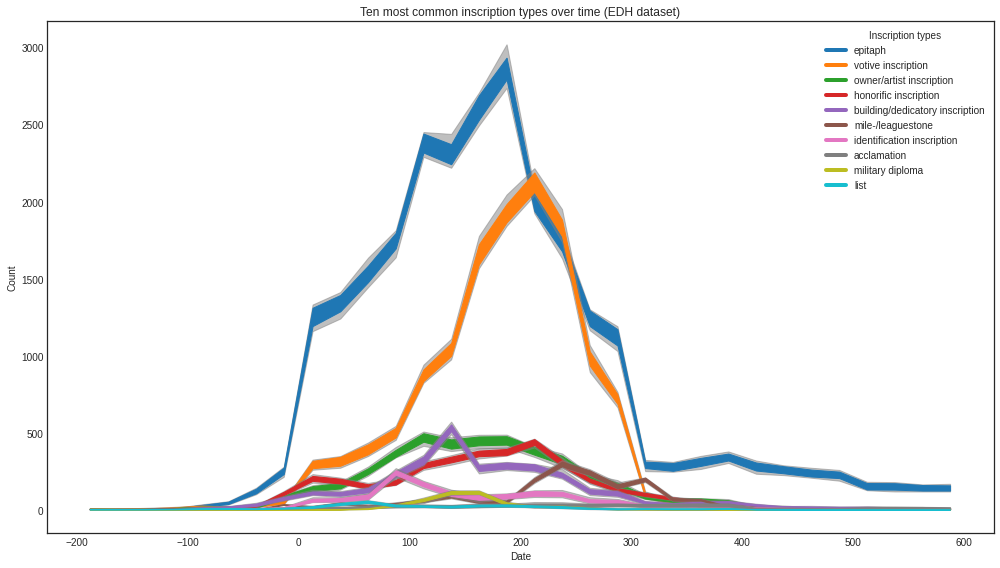

In [72]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDH, tab_colors_list[:len(simulations_by_type_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Ten most common inscription types over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDH)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type_EDH], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

### Epigraphic production over time based on the EDSC dataset

In [58]:
# EDCS dataset
EDCS["start_yr"] = pd.to_numeric(EDCS["start_yr"])
EDCS["end_yr_1"] = pd.to_numeric(EDCS["end_yr_1"])

### how many of the inscriptions have at least one date
EDCS_dated = EDCS[(EDCS["start_yr"].notnull()) | (EDCS["end_yr_1"].notnull())]
len(EDCS_dated)

164452

In [13]:
# How many inscriptions do not have the end date
len(EDCS_dated[EDCS_dated["end_yr_1"].isnull()])

117

In [15]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDCS["random_dates"] = EDCS.apply(lambda row: tempun.model_date(row["start_yr"], row["end_yr_1"], size=1000,), axis=1)

CPU times: user 1min 43s, sys: 4.59 s, total: 1min 47s
Wall time: 1min 47s


In [17]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range

EDCS_complete_simulations = tempun.timeblocks_from_randoms(EDCS, "random_dates", [-200, 600, 25])

CPU times: user 13.3 s, sys: 225 ms, total: 13.5 s
Wall time: 13.5 s


In [18]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDCS_complete_simulations[0]

[((-200, -176), 194),
 ((-175, -151), 174),
 ((-150, -126), 279),
 ((-125, -101), 460),
 ((-100, -76), 966),
 ((-75, -51), 1035),
 ((-50, -26), 2090),
 ((-25, -1), 4129),
 ((1, 25), 11379),
 ((26, 50), 11017),
 ((51, 75), 10837),
 ((76, 100), 10524),
 ((101, 125), 12326),
 ((126, 150), 11593),
 ((151, 175), 11190),
 ((176, 200), 12192),
 ((201, 225), 11213),
 ((226, 250), 8191),
 ((251, 275), 5392),
 ((276, 300), 4880),
 ((301, 325), 4952),
 ((326, 350), 4466),
 ((351, 375), 5014),
 ((376, 400), 4843),
 ((401, 425), 3099),
 ((426, 450), 2359),
 ((451, 475), 2114),
 ((476, 500), 2165),
 ((501, 525), 736),
 ((526, 550), 683),
 ((551, 575), 507),
 ((576, 600), 424)]

In [60]:
# Tranform inscription type to list
EDCS_dated["inscr_type"].tolist()[:20]

['tituli honorarii',
 'tituli honorarii',
 {},
 {},
 'leges',
 ['leges', 'tituli sacri'],
 'tituli honorarii',
 'miliaria',
 {},
 'leges',
 {},
 'tituli sacri',
 {},
 {},
 {},
 {},
 ['tituli honorarii', 'tituli sacri'],
 {},
 {},
 {}]

In [61]:
# Function to count all instances of types of inscriptions (multiple tags in EDCS)
def clean_inscr_type(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el

In [62]:
EDCS_dated["inscr_type_list"] = EDCS_dated["inscr_type"].apply(clean_inscr_type)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
inscr_types_flatlist = [el for ellist in EDCS_dated["inscr_type_list"].tolist() for el in ellist]
simulations_by_type_len_EDCS = list(nltk.FreqDist(inscr_types_flatlist).most_common())
simulations_by_type_len_EDCS

[('tituli sepulcrales', 82653),
 ('inscriptiones christianae', 27143),
 ('tituli sacri', 20194),
 ('tituli fabricationis', 9381),
 ('tituli operum', 8681),
 ('tituli possessionis', 5845),
 ('tituli honorarii', 5742),
 ('miliaria', 3842),
 ('carmina', 1891),
 ('diplomata militaria', 1033),
 ('leges', 621),
 ('termini', 531),
 ('defixiones', 409),
 ('signacula', 303),
 ('reges', 104),
 ('senatus consulta', 22)]

In [132]:
%%time
# Inscriptions by type over time

simulations_by_type_EDCS = []

for ins_type_tup in simulations_by_type_len_EDCS[:10]:
    subset_df = EDCS[EDCS["inscr_type"]==ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_type_EDCS.append([ins_type_tup[0],ins_type_N, simulations]) 
#simulations_by_type_EDCS = sorted(simulations_by_type_EDCS, key=lambda x: x[1], reverse=True)


date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDCS[:10]:
    subset_df = EDCS[EDCS["inscr_type"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 12.1 s, sys: 170 ms, total: 12.3 s
Wall time: 12.3 s


In [133]:
simulations_by_type_EDCS

[['tituli sepulcrales',
  115664,
  [[((-200, -176), 17),
    ((-175, -151), 19),
    ((-150, -126), 48),
    ((-125, -101), 122),
    ((-100, -76), 344),
    ((-75, -51), 355),
    ((-50, -26), 808),
    ((-25, -1), 1395),
    ((1, 25), 4644),
    ((26, 50), 4319),
    ((51, 75), 4331),
    ((76, 100), 4517),
    ((101, 125), 5570),
    ((126, 150), 5324),
    ((151, 175), 5347),
    ((176, 200), 5964),
    ((201, 225), 3569),
    ((226, 250), 2872),
    ((251, 275), 1905),
    ((276, 300), 1703),
    ((301, 325), 212),
    ((326, 350), 183),
    ((351, 375), 154),
    ((376, 400), 165),
    ((401, 425), 96),
    ((426, 450), 62),
    ((451, 475), 56),
    ((476, 500), 55),
    ((501, 525), 26),
    ((526, 550), 36),
    ((551, 575), 29),
    ((576, 600), 13)],
   [((-200, -176), 25),
    ((-175, -151), 19),
    ((-150, -126), 42),
    ((-125, -101), 125),
    ((-100, -76), 342),
    ((-75, -51), 369),
    ((-50, -26), 817),
    ((-25, -1), 1368),
    ((1, 25), 4496),
    ((26, 50), 4

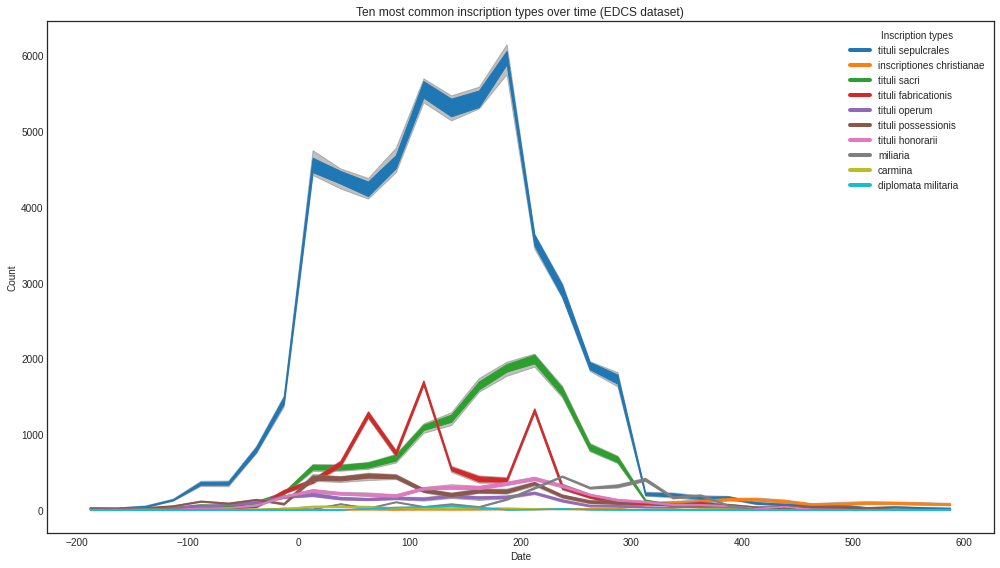

In [134]:
# plot of EDCS only -  ERROR: IndexError: tuple index out of range

tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDCS, tab_colors_list[:len(simulations_by_type_EDCS)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Ten most common inscription types over time (EDCS dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDCS)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type_EDCS], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')


NameError: name 'simulations_by_type__len_EDCS' is not defined

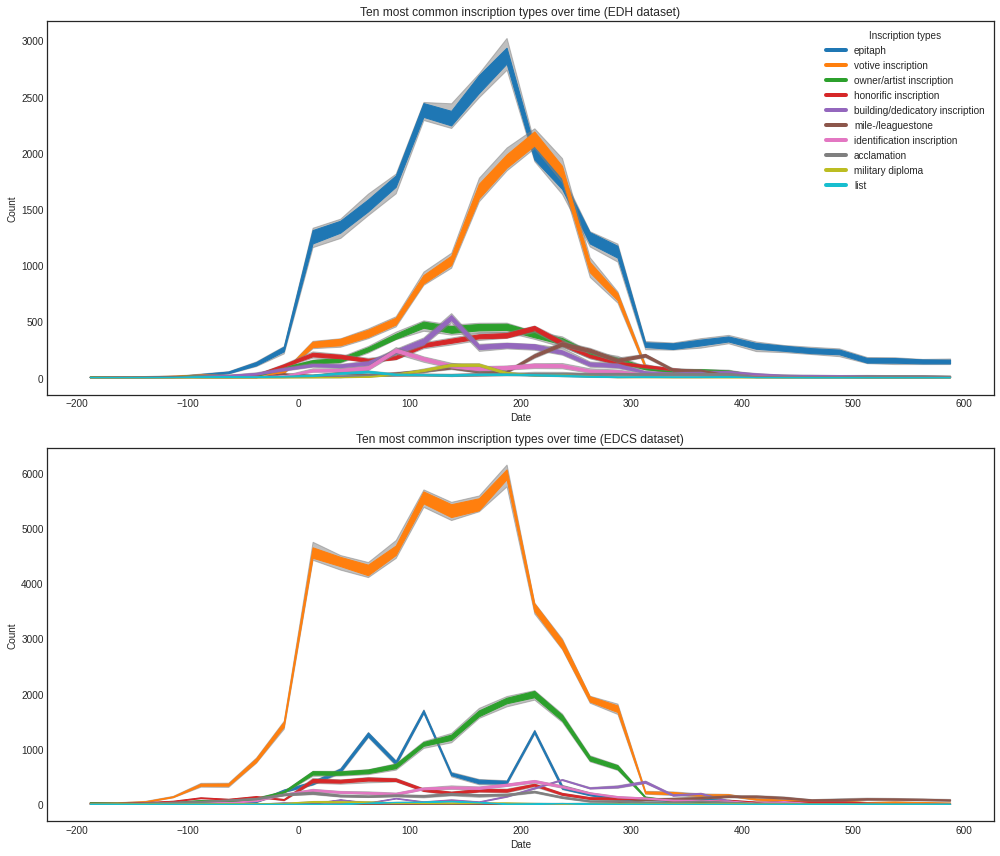

In [131]:
# plot combining EDH and EDCS
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, [ax1, ax2]  = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDH, tab_colors_list[:len(simulations_by_type_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax1, color=color)
    
ax1.set_xlabel("Date")
ax1.set_ylabel("Count")
ax1.set_title("Ten most common inscription types over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDH)]]
ax1.legend(markers, [tup[0] for tup in simulations_by_type_EDH], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

for ins_type_sims, color in zip(simulations_by_type_EDCS, tab_colors_list[:len(simulations_by_type_EDCS)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax2, color=color)
    
ax2.set_xlabel("Date")
ax2.set_ylabel("Count")
ax2.set_title("Ten most common inscription types over time (EDCS dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDCS)]]
ax2.legend(markers, [tup[0] for tup in simulations_by_type_EDCS], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')